In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn import svm

In [118]:
file_path = 'seismic_data.csv'  
data = pd.read_csv(file_path)

In [119]:
data = data.dropna(axis=1)
data = data.drop_duplicates() 
data = data.drop(columns=['Date(UTC)'])
data

,Latitude,Longitude,Depth,Magnitude
0,-23.97,-70.25,44,5.0
1,-26.09,-70.97,46,5.0
2,-19.49,-69.44,92,5.0
3,-21.34,-68.95,117,5.3
4,-24.16,-69.37,96,5.2
...,...,...,...,...
3692,-33.05,-71.06,69,5.2
3693,-25.00,-69.75,100,5.0
3694,-19.74,-69.25,101,5.3
3695,-21.60,-70.06,47,5.3


Creacion de Variable objetivo

In [120]:
threshold = 5.0
data['terremoto'] = (data['Magnitude'] >= threshold).astype(int)
terremotos = data[data['terremoto'] == 1]
terremotos

,Latitude,Longitude,Depth,Magnitude,terremoto
0,-23.97,-70.25,44,5.0,1
1,-26.09,-70.97,46,5.0,1
2,-19.49,-69.44,92,5.0,1
3,-21.34,-68.95,117,5.3,1
4,-24.16,-69.37,96,5.2,1
...,...,...,...,...,...
3692,-33.05,-71.06,69,5.2,1
3693,-25.00,-69.75,100,5.0,1
3694,-19.74,-69.25,101,5.3,1
3695,-21.60,-70.06,47,5.3,1


In [121]:
no_terremotos = data[data['terremoto'] == 0]
no_terremotos

,Latitude,Longitude,Depth,Magnitude,terremoto
6,-23.03,-70.70,37,4.7,0
9,-32.63,-71.55,34,3.0,0
12,-30.05,-71.62,43,3.9,0
13,-30.08,-71.58,42,4.4,0
15,-20.83,-69.83,43,4.7,0
...,...,...,...,...,...
3660,-32.96,-71.39,45,4.9,0
3662,-30.77,-71.39,35,4.5,0
3664,-30.54,-71.61,23,4.2,0
3669,-29.83,-71.32,56,4.2,0


In [122]:
X = data[['Latitude', 'Longitude', 'Depth']]
y = data['terremoto']

In [123]:
smote = SMOTE(random_state=2024)
X_smote, y_smote = smote.fit_resample(X, y)
print(y_smote.value_counts())

terremoto
1    2921
0    2921
Name: count, dtype: int64


In [124]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=2024)

In [125]:
model_rf = RandomForestClassifier(n_estimators=110)
model_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=110)

Precision: 0.7741659538066724


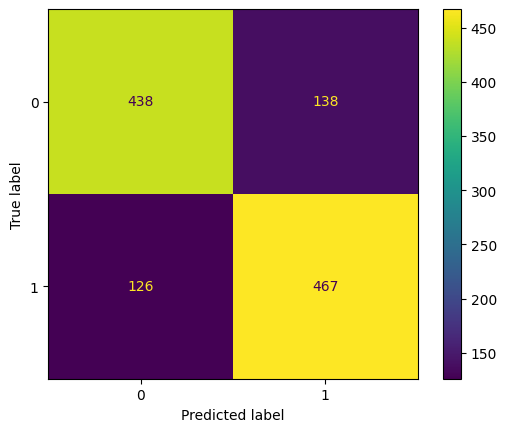

In [126]:
y_pred_rf = model_rf.predict(X_test)
accuracy = model_rf.score(X_test, y_test)

print("Precision:", accuracy)
cm = confusion_matrix(y_test, y_pred_rf )
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [127]:
estimator = model_rf.estimators_[10]

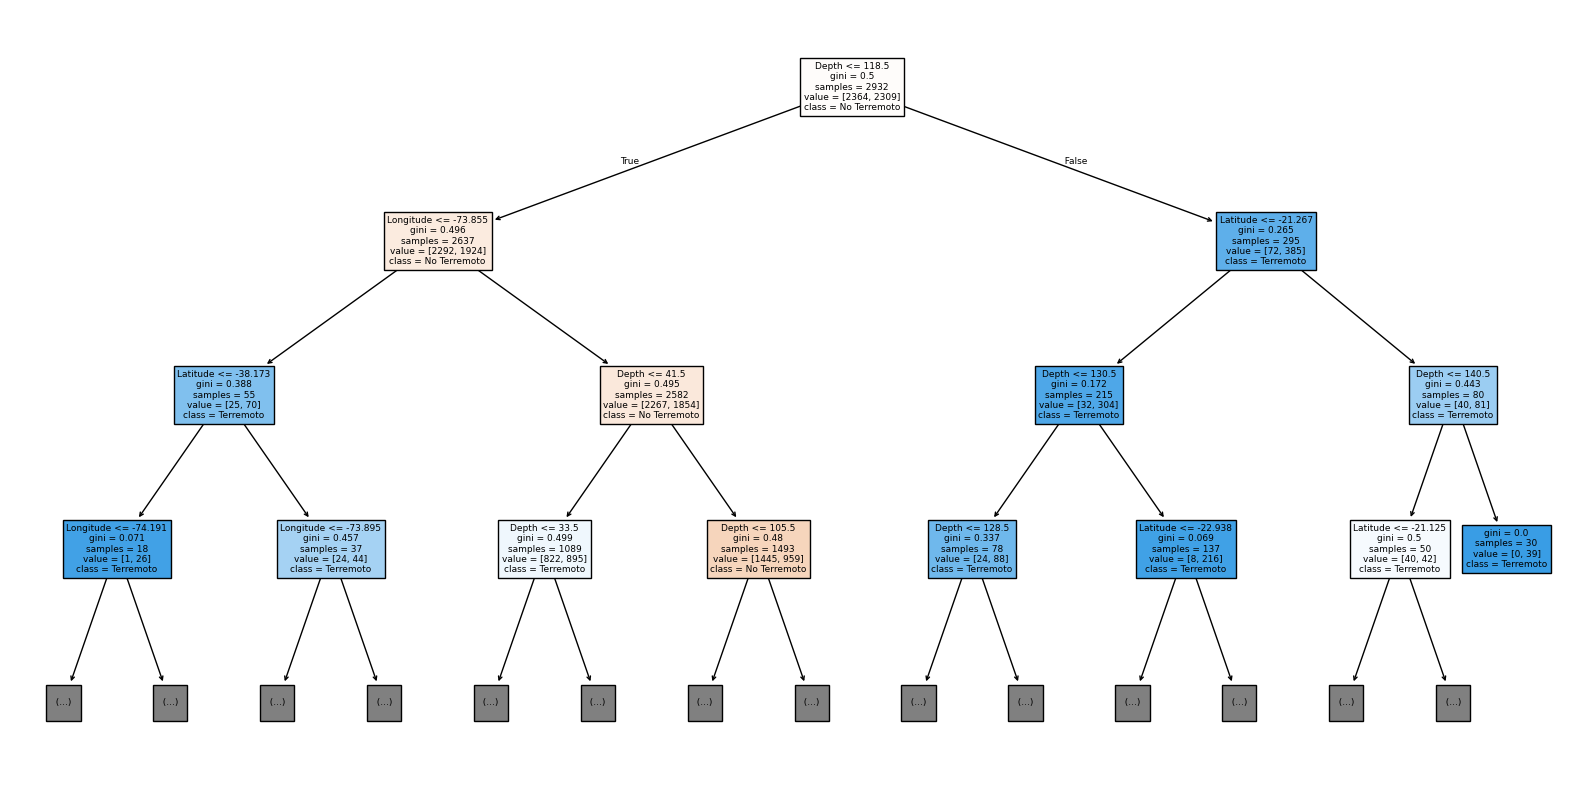

In [128]:
plt.figure(figsize=(20, 10))
plot_tree(estimator, max_depth=3, feature_names=['Latitude', 'Longitude', 'Depth'], class_names=['No Terremoto', 'Terremoto'], filled=True)
plt.show()

In [129]:
nuevo_dataset = pd.read_csv('chile_earthquakes_1520-2024.tsv', sep='\t')


nuevo_dataset = nuevo_dataset.rename(columns={'Focal Depth (km)': 'Depth'})
nuevo_X = nuevo_dataset[['Latitude', 'Longitude', 'Depth']]

threshold = 5.0
nuevo_dataset['terremoto'] = (nuevo_dataset['Mag'] >= threshold).astype(int)

nuevas_predicciones = model_rf.predict(nuevo_X)

nuevo_y = nuevo_dataset['terremoto']
precision_nueva = accuracy_score(nuevo_y, nuevas_predicciones)
print("Precisión en el nuevo dataset:", precision_nueva)



Precisión en el nuevo dataset: 0.4623115577889447


In [130]:
svm_rbf = svm.SVC(kernel='rbf', gamma='auto', random_state=2024)
svm_rbf.fit(X_train, y_train)

SVC(gamma='auto', random_state=2024)

In [131]:
y_pred_svm = svm_rbf.predict(X_test)

In [132]:
accuracy = accuracy_score(y_test, y_pred_svm)
print("Precisión:", accuracy)

Precisión: 0.7023096663815227


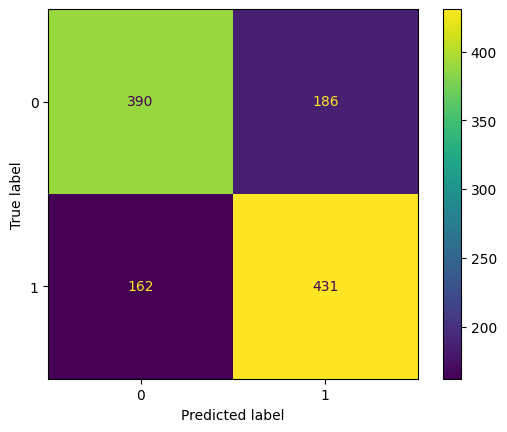

In [133]:
cm = confusion_matrix(y_test, y_pred_svm )
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()